# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot. The data can be found [here](https://drive.google.com/file/d/1tgx8nnEXLcqy1ds_99T_14-2B9TM-Gne/view?usp=sharing), please downloand and place them in your local data folder from which you can read them.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/elskedenbode/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
pip install --upgrade pandas

Requirement already up-to-date: pandas in /Users/elskedenbode/opt/anaconda3/lib/python3.7/site-packages (1.1.2)
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Read the data
df = pd.read_csv('../data/liquor_store_sales.csv')
df.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

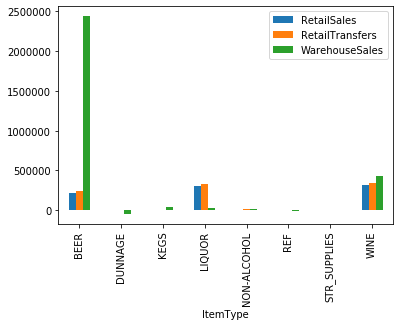

In [5]:
sales = df[["RetailSales", "RetailTransfers", "WarehouseSales"]].groupby(df["ItemType"]).agg("sum")
sales.plot.bar();

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

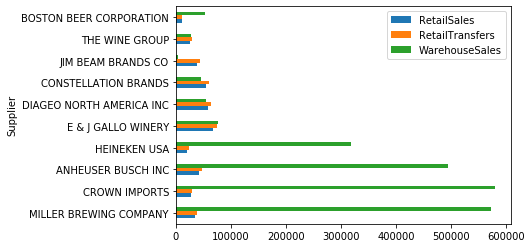

In [6]:
#aggregate total sales as a reference for the groupby
df["Total"] = df["RetailSales"] +  df["RetailTransfers"] + df["WarehouseSales"]
df_supplier = df.groupby(df["Supplier"]).sum()
df_supplier.sort_values("Total", inplace=True, ascending=False)
df_topten = df_supplier.head(10).iloc[:,2:5]
df_topten.plot.barh()

## 3. Create a bar-chart chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

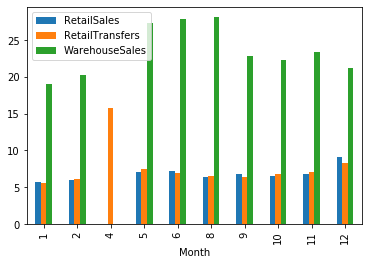

In [7]:
monthlyav = df[["RetailSales", "RetailTransfers", "WarehouseSales"]].groupby(df["Month"]).agg("mean")
monthlyav.plot.bar()

## 4. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

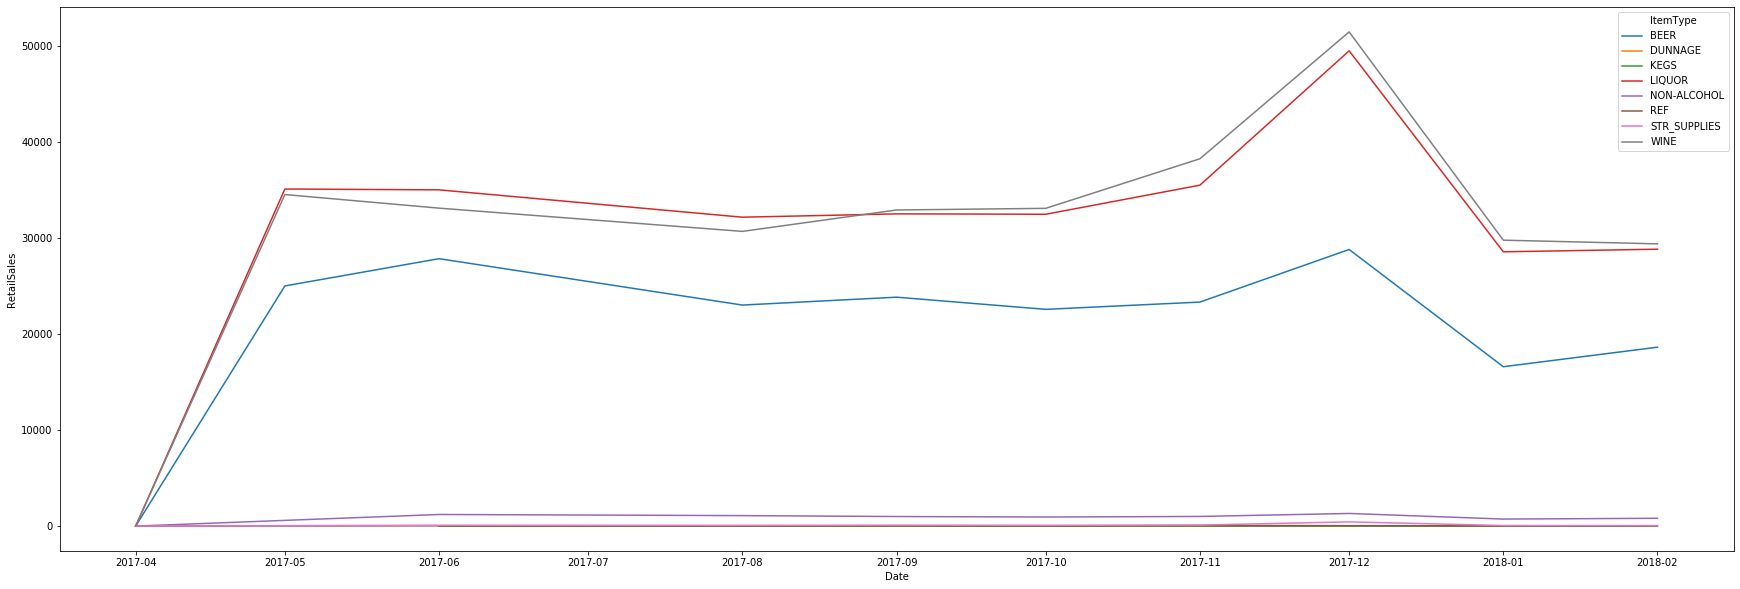

In [8]:
plt.figure(figsize=(30,10))
df["Date"] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
#df.Date = df.Date.astype(float)
df_retail = df.groupby(["ItemType", "Date"]).sum().reset_index()
sns.lineplot(x = df_retail["Date"], y = df_retail["RetailSales"],  hue = df_retail["ItemType"], data = df_retail)

## 6. Plot the same information as above (i.e. Q5) but as a bar chart.

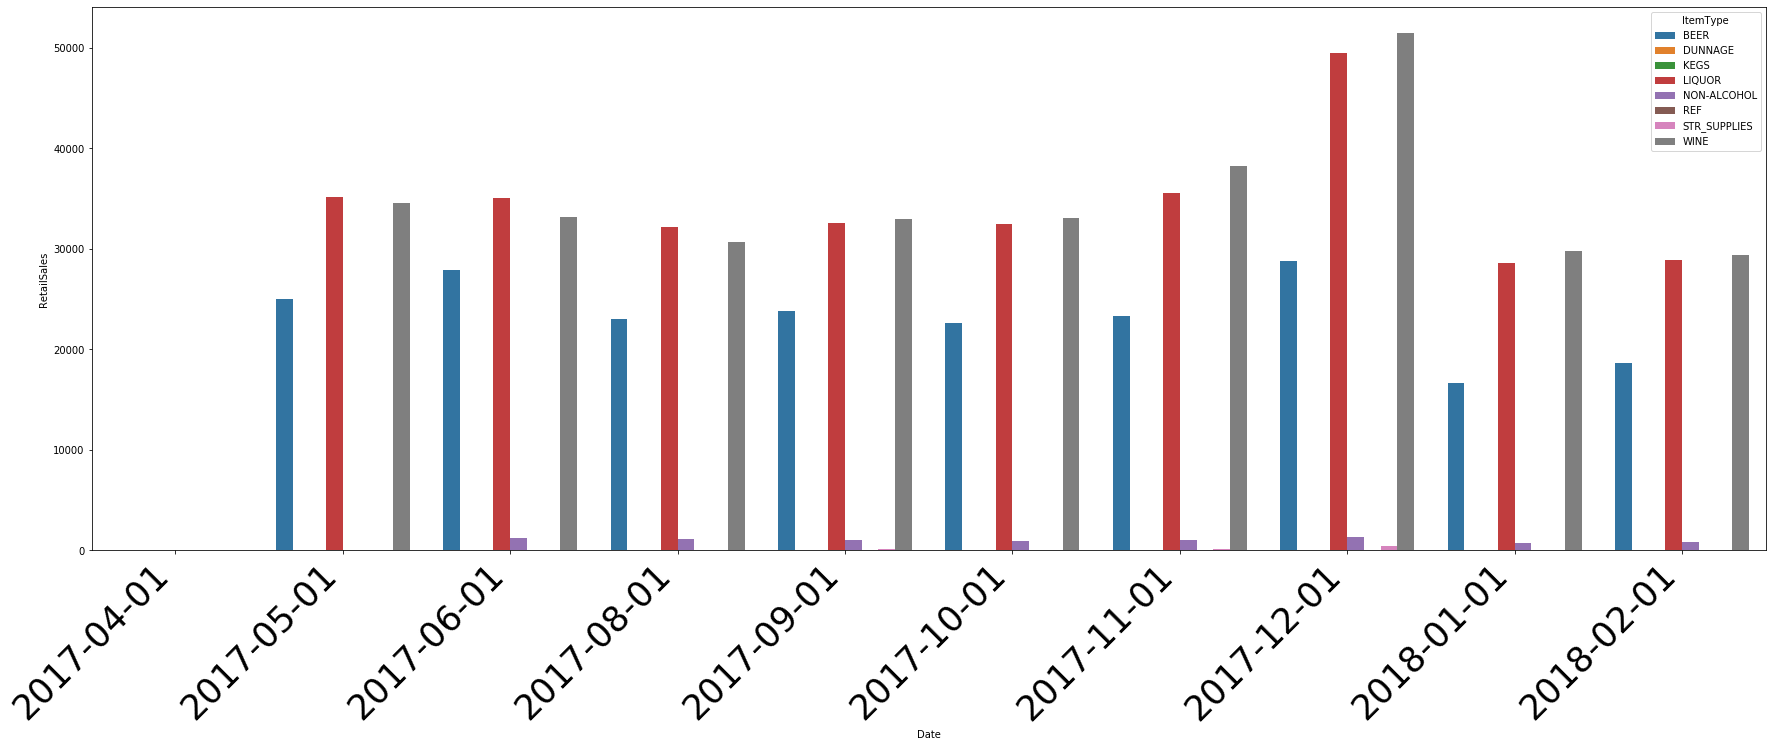

In [9]:
fig, ax = plt.subplots(figsize=(30,10))
fig = sns.barplot(x = df_retail["Date"], y = df_retail["RetailSales"],  hue = df_retail["ItemType"], data = df_retail, ax=ax);
labels=df_retail["Date"].dt.strftime('%Y-%m-%d').sort_values().unique();
ax.set_xticklabels(labels=labels, size=35, rotation=45, ha='right');

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

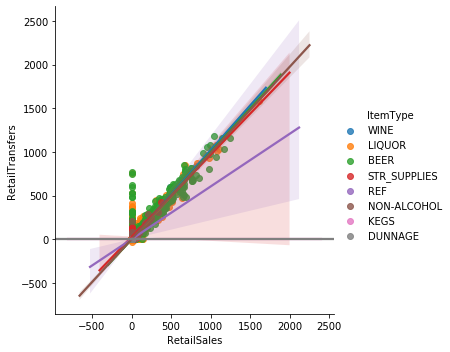

In [10]:
sns.lmplot(x="RetailSales", y="RetailTransfers", hue="ItemType", data=df)

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

/Users/elskedenbode/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/elskedenbode/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


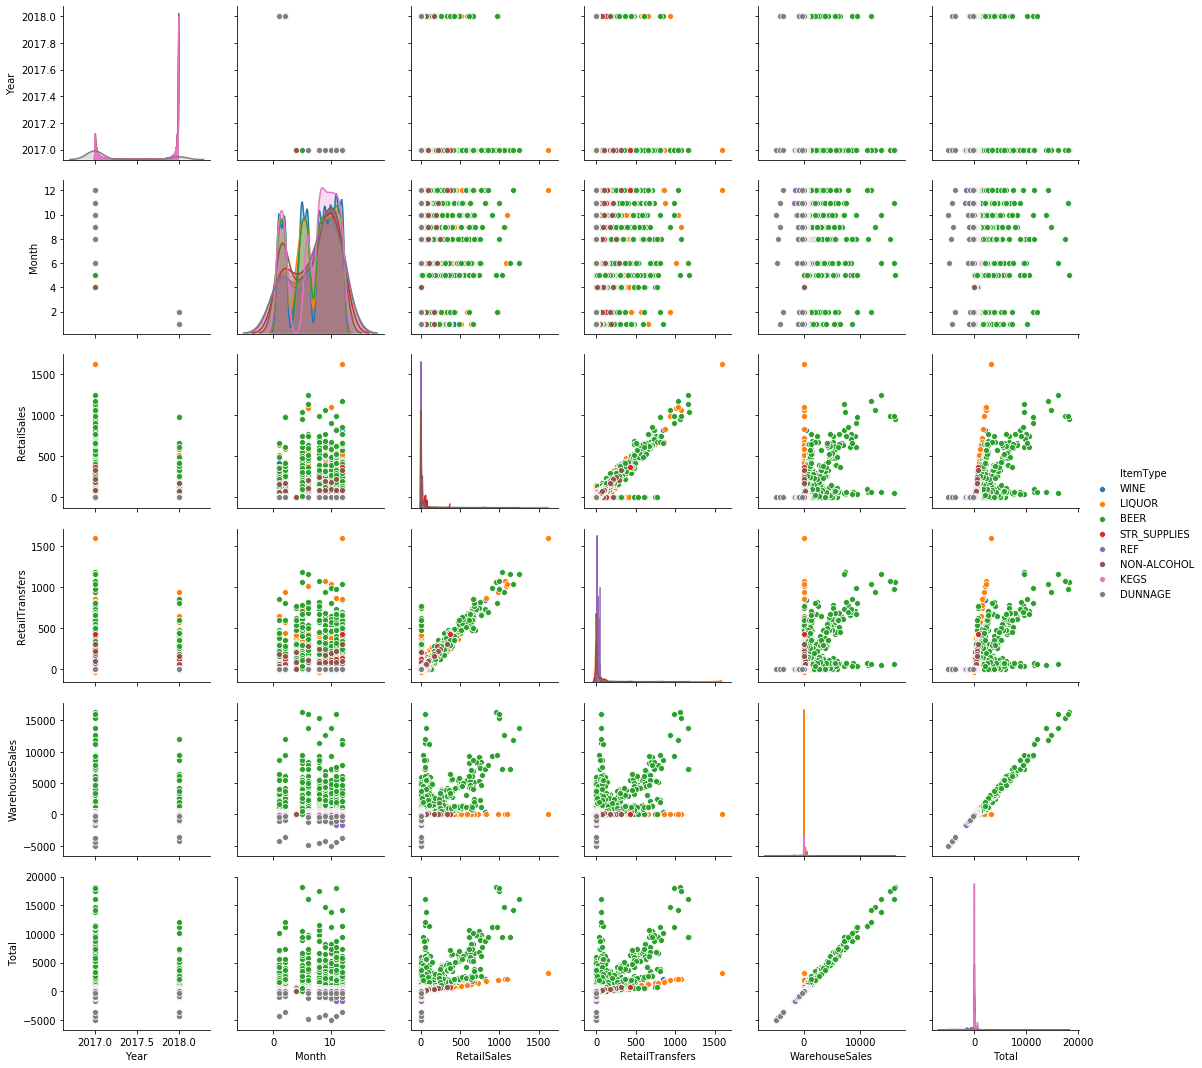

In [13]:
sns.pairplot(df, hue = "ItemType");

In [15]:
#or 
newestdf = df.drop(df.columns[[2, 3, 4]], axis=1)

/Users/elskedenbode/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/elskedenbode/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


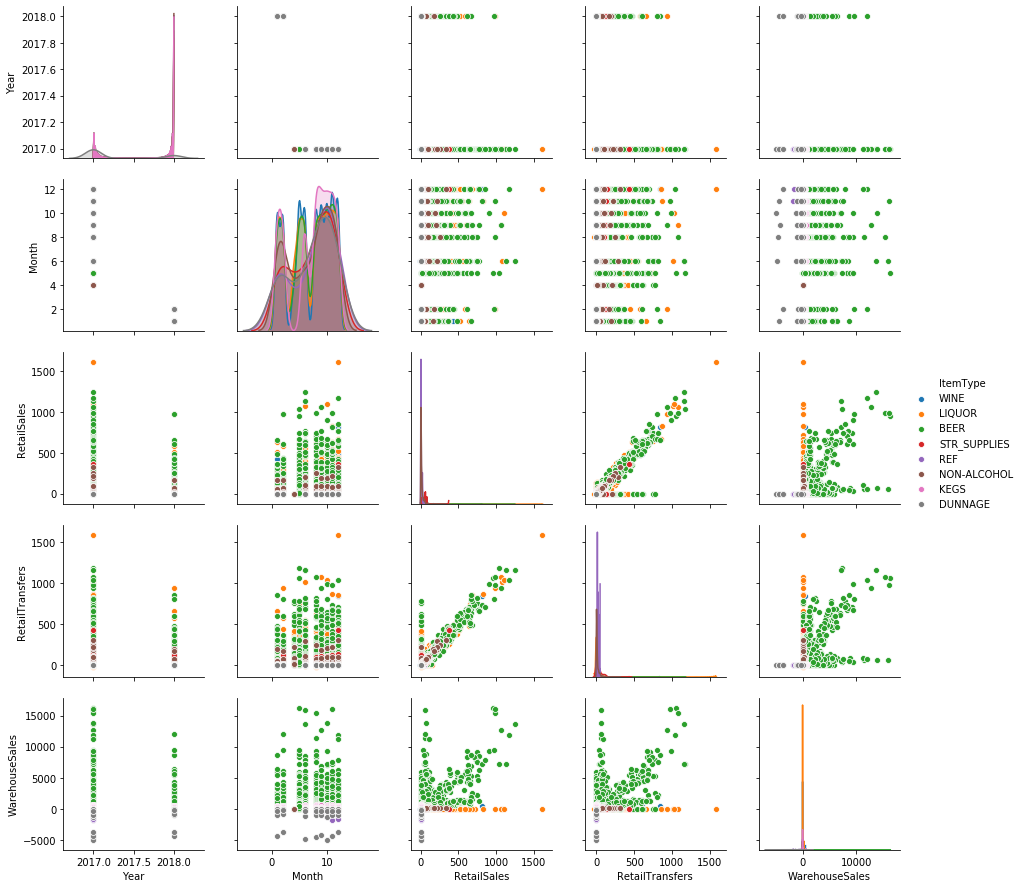

In [16]:
sns.pairplot(newestdf, hue = "ItemType");